In [27]:
# current date, for retrieving data from proper location.
year = "2023"
month = "December"
day = "13"

## Imports and initialization

In [28]:
%config Completer.use_jedi = False
import numpy as np 
from scipy.optimize import curve_fit
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
import scipy.signal
import matplotlib.ticker as ticker
from matplotlib import gridspec
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
warnings.filterwarnings("ignore", category=RuntimeWarning)
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle

from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
color2 = 'tab:blue'
color1 = 'tab:green'
color3 = 'tab:red'
markersize = 10
capsize = 5
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

In [29]:
import sys
sys.path.append("../..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.Constants as cs
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
import Analysis_Python_Files.CollisionalAnalysis as lac
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

In [30]:
atomlocs = [2, 2, 3, 3, 1]

In [31]:
loadNone = tao.condition([0,0,0], [0,1,2], [0,0,0])

loadOne = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 1, name = 'Load any one tweezer')
# tao.condition([0 = 1st pic, 1 = 2nd pic],

loadTwo = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 2, name = 'Load any two tweezers')
loadThree = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 3, name = 'Load all three tweezers')
loadOuter = tao.condition([0,0,0], [0,1,2], [1,0,1], numRequired = 2, name = 'Load outer tweezers')

finCenter = tao.condition([1],[1],[1], markerWhichPicList=[1], markerLocList=[1])
# 
# loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo], [loadThree]],[finCenter for _ in range(3)]);
loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo]],[finCenter for _ in range(2)]);
loadOneOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne]],[finCenter for _ in range(1)]);
loadTwoOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadTwo]],[finCenter for _ in range(1)]);
loadThreeOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadThree]],[finCenter for _ in range(1)]);
loadOuterOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOuter]],[finCenter for _ in range(1)]);

## trap frequency measurements

In [49]:
U0 = 0.72e-3
U0_unc = 0.04693e-3
w_r = 234.19/2*1e3*(2*np.pi)
w_r_unc = 0.94*1e3*(2*np.pi)
w_a = 50.448/2*1e3*(2*np.pi)
w_a_unc = 0.88*1e3*(2*np.pi)
w_unc = (w_r_unc**2 * w_a_unc)**(1/3)

### File 25 (7x1_trap_frequency_measurements): axial 

Number of Pictures: 2000; Picture Dimensions: 5 x 24
Variations: 10;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 15:19:11: on (Y-M-D) 2024-4-16, And ended at 15:26:44: on 2024-4-16
Experiment Notes:  

Avg Fit R-Squared: 0.986


A: -0.685(34)<br>  $x_0$: 50.448(88)<br>  $\sigma$: 1.96(14)<br>  offset: 0.893(28)<br>  $x_0$: 50.448(88)

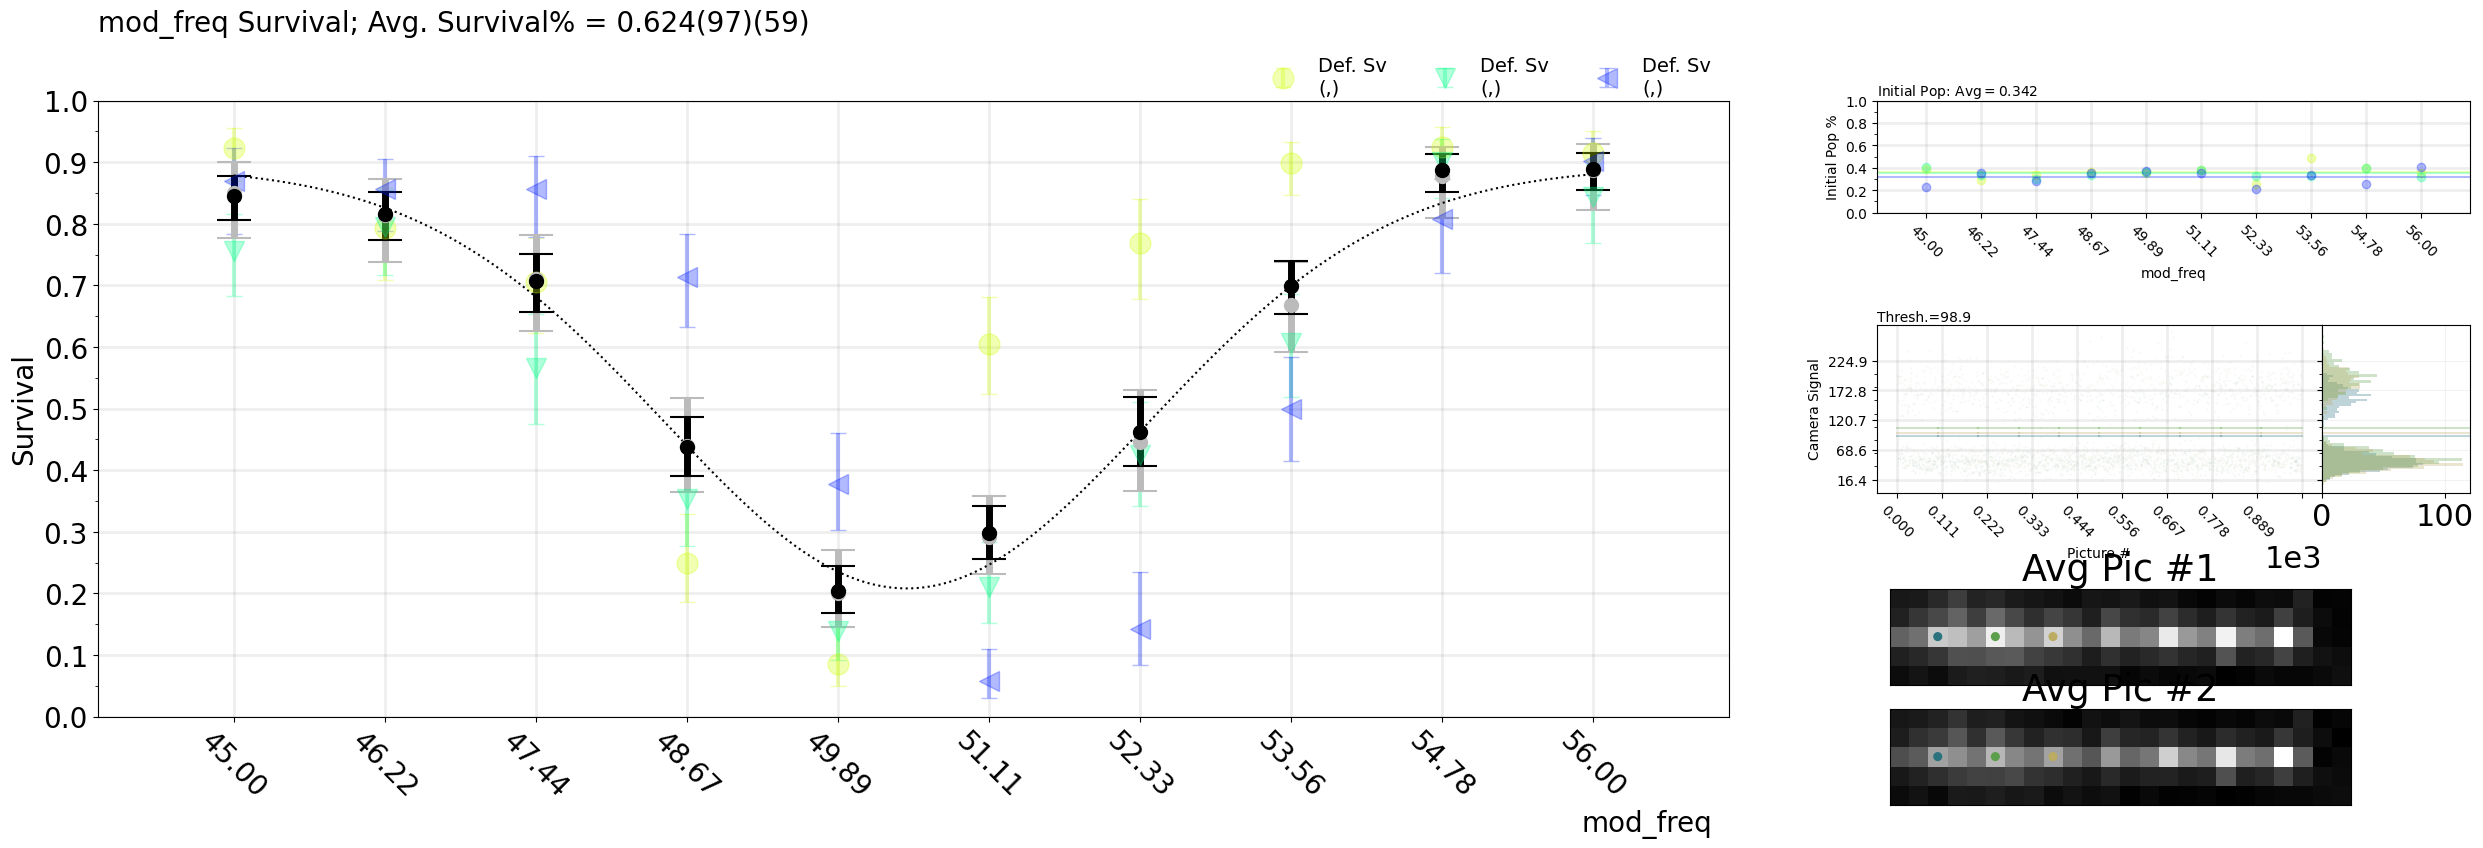

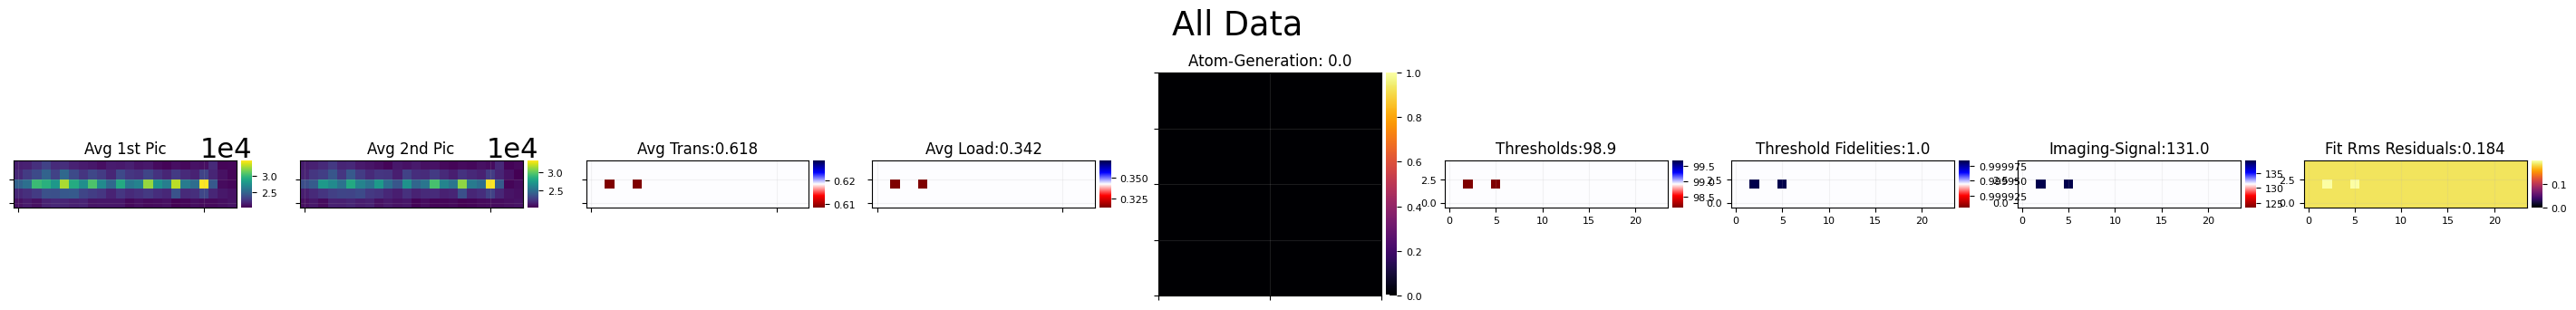

In [35]:
atomlocs = [2,2,3,3,1]
reloadMyModules(16,'April','2024')
mp.Survival(25, atomlocs,fitModules = dip);

### File 27 (7x1_trap_frequency_measurements): radial

Number of Pictures: 2000; Picture Dimensions: 5 x 24
Variations: 10;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 15:31:53: on (Y-M-D) 2024-4-16, And ended at 15:39:25: on 2024-4-16
Experiment Notes:  

Avg Fit R-Squared: 0.968


A: -0.920(69)<br>  $x_0$: 234.19(94)<br>  $\sigma$: 12.5(13)<br>  offset: 0.922(48)<br>  $x_0$: 234.19(94)

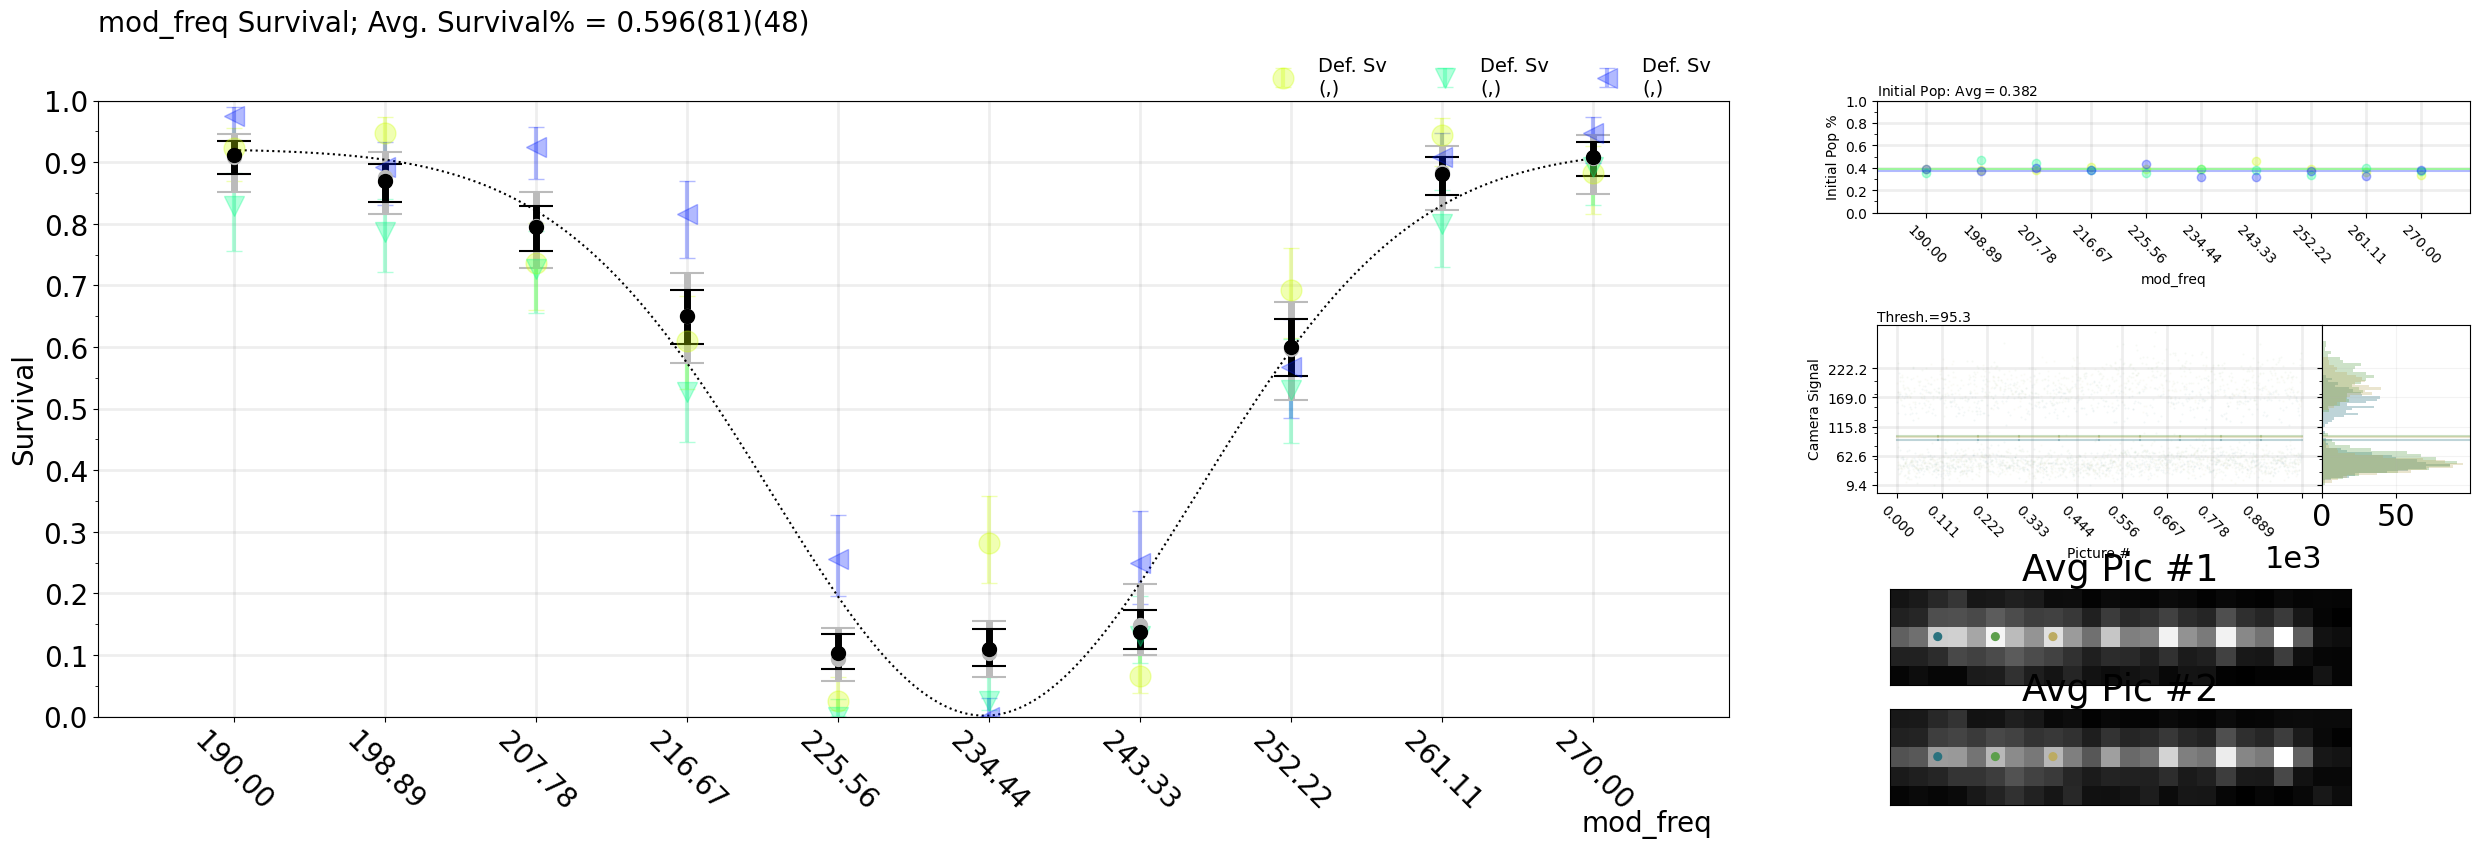

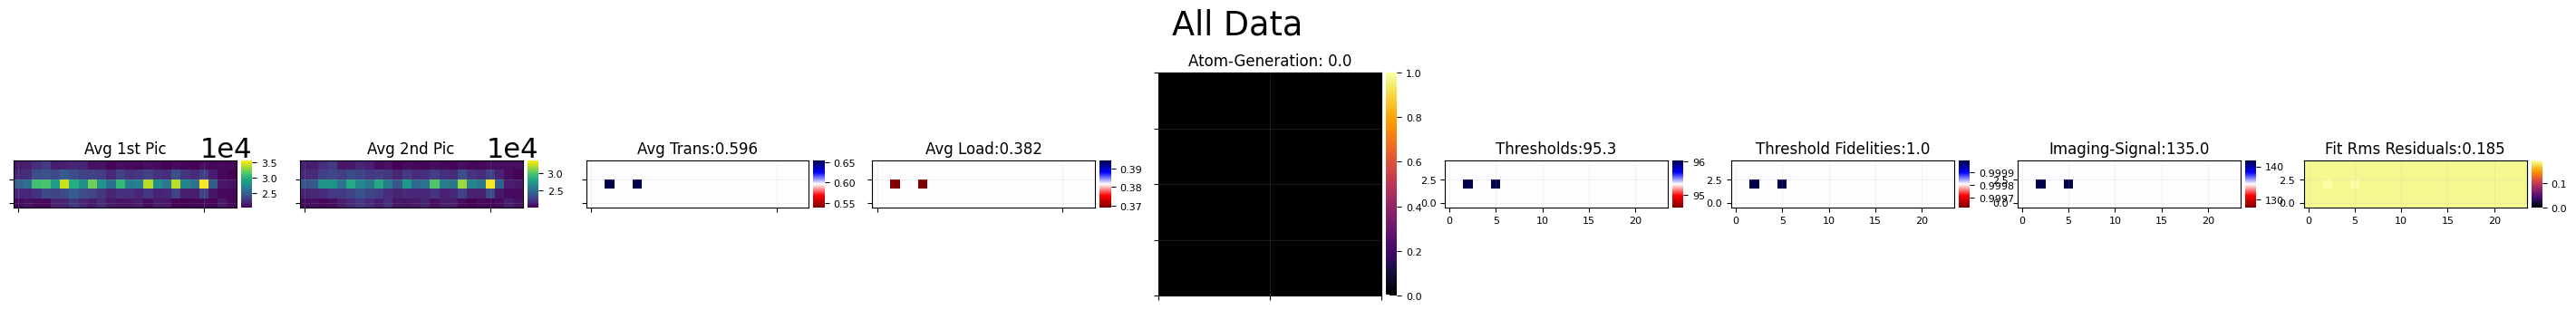

In [36]:
atomlocs = [2,2,3,3,1]
reloadMyModules(16,'April','2024')
mp.Survival(27, atomlocs,fitModules = dip);

# D2 $T_0$ data: all in $\sigma^+ \sigma^-$

## 15 uK

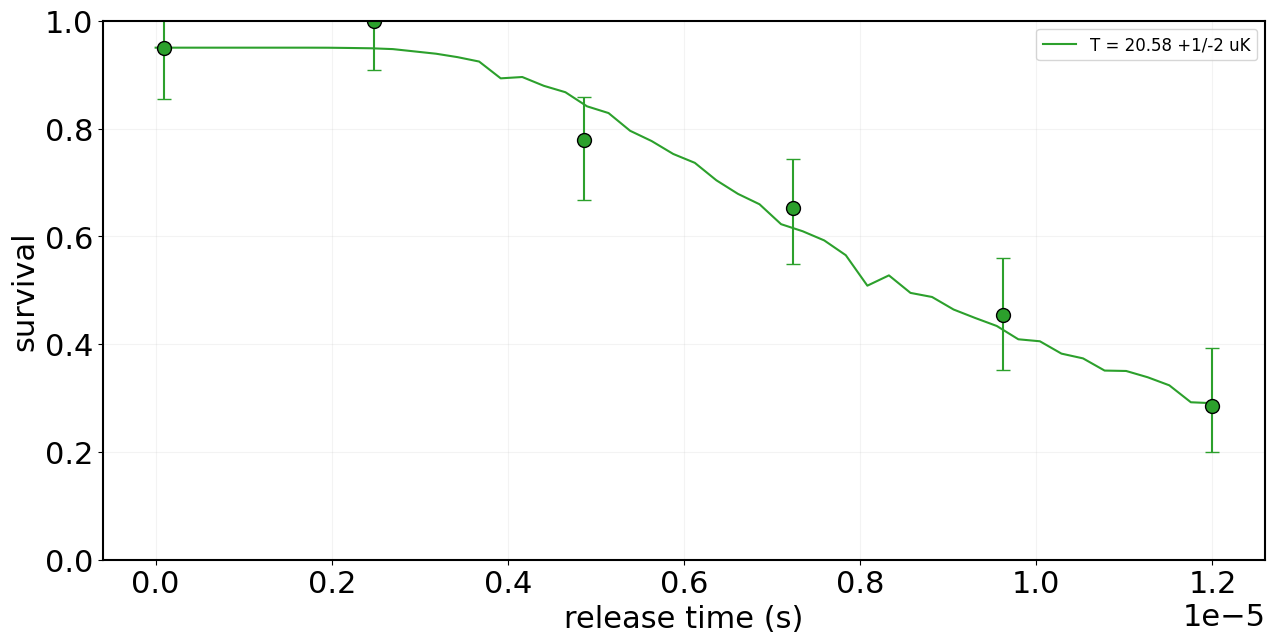

In [626]:
reloadMyModules(9,"january","2024")
fileId1 = 7
threshold = 65

x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 15e-6
trap_depth = U0
load_one_y1[0]=.95

fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1)#,last_index=5)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

### PGC

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning:

Covariance of the parameters could not be estimated



beta = 1.7985207721376532e-10 +/- 2.5286863710629768e-11


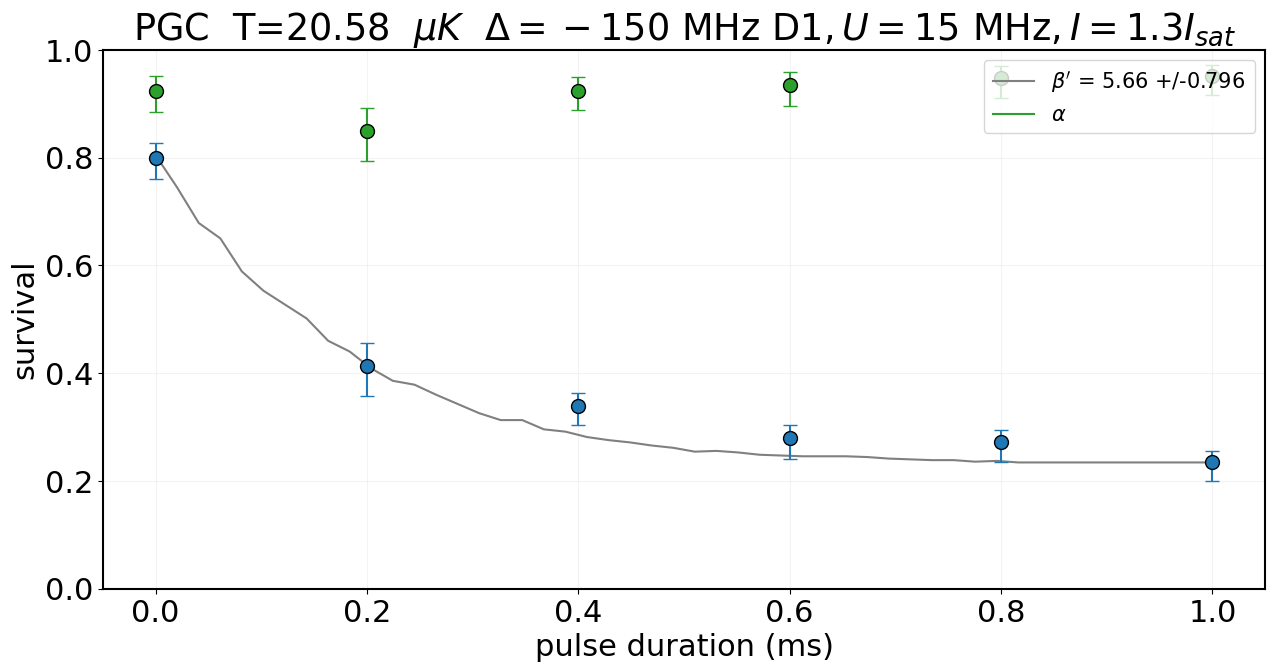

In [108]:
reloadMyModules(9,"january","2024")
fileId = 13
threshold = 65

x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

T0 = 20.58e-6
T0_unc = 1e-6
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.2,range_step=0.01)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,asymp=0.23), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_tau=False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'PGC  T=20.58  $  \mu K  \ \ \Delta = -150 \ \mathrm{MHz} \ \mathrm{D1}, U=15 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_15uK_PGC,beta_15uK_PGC_unc = lac.betaCalc(decay_constant,U0,T0,decay_unc,U0_unc,T0_unc)
print('beta =',beta_15uK_PGC,'+/-',beta_15uK_PGC_unc)

### No PGC

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning:

Covariance of the parameters could not be estimated



beta = 3.59972549239624e-11 +/- 1.2766038477464625e-11


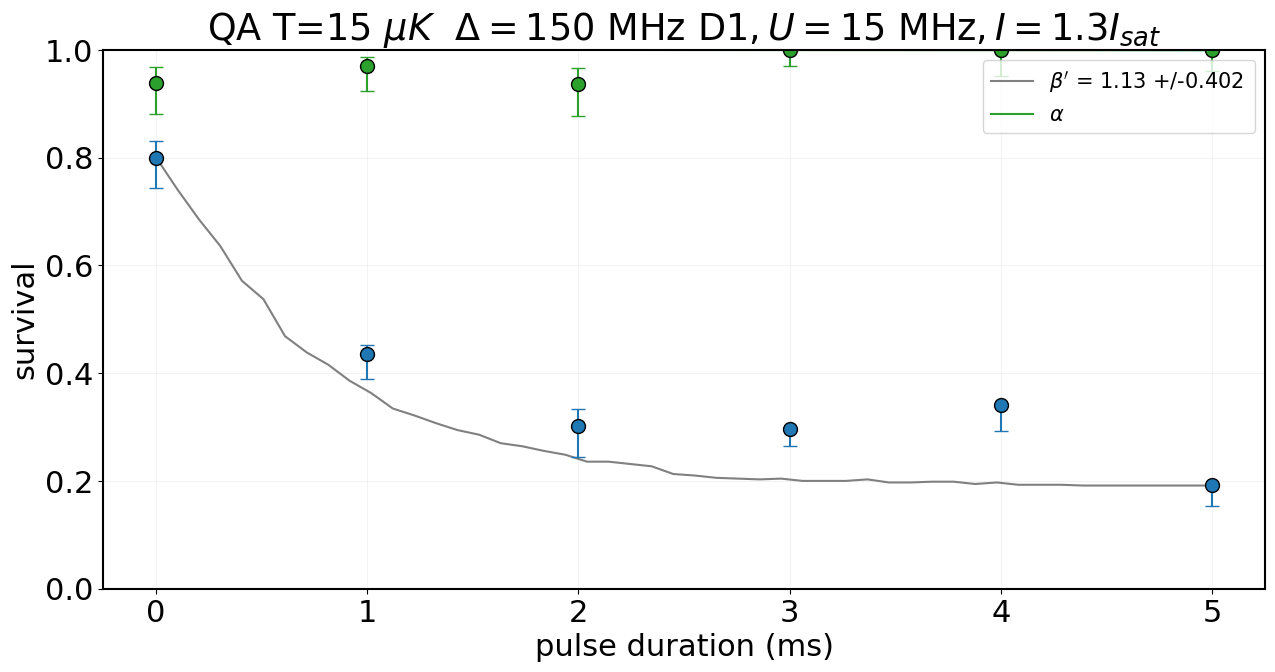

In [109]:
reloadMyModules(11,"january","2024")
fileId = 7
threshold = 75
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

T0 = 20.58e-6
T0_unc = 1e-6
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.2,range_step=0.01)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,asymp=0.2), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_tau=False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'QA T=15 $\mu K  \ \ \Delta = 150 \ \mathrm{MHz} \ \mathrm{D1}, U=15 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_15uK_D2,beta_15uK_D2_unc = lac.betaCalc(decay_constant,U0,T0,decay_unc,U0_unc,T0_unc)
print('beta =',beta_15uK_D2,'+/-',beta_15uK_D2_unc)

## 40 uK

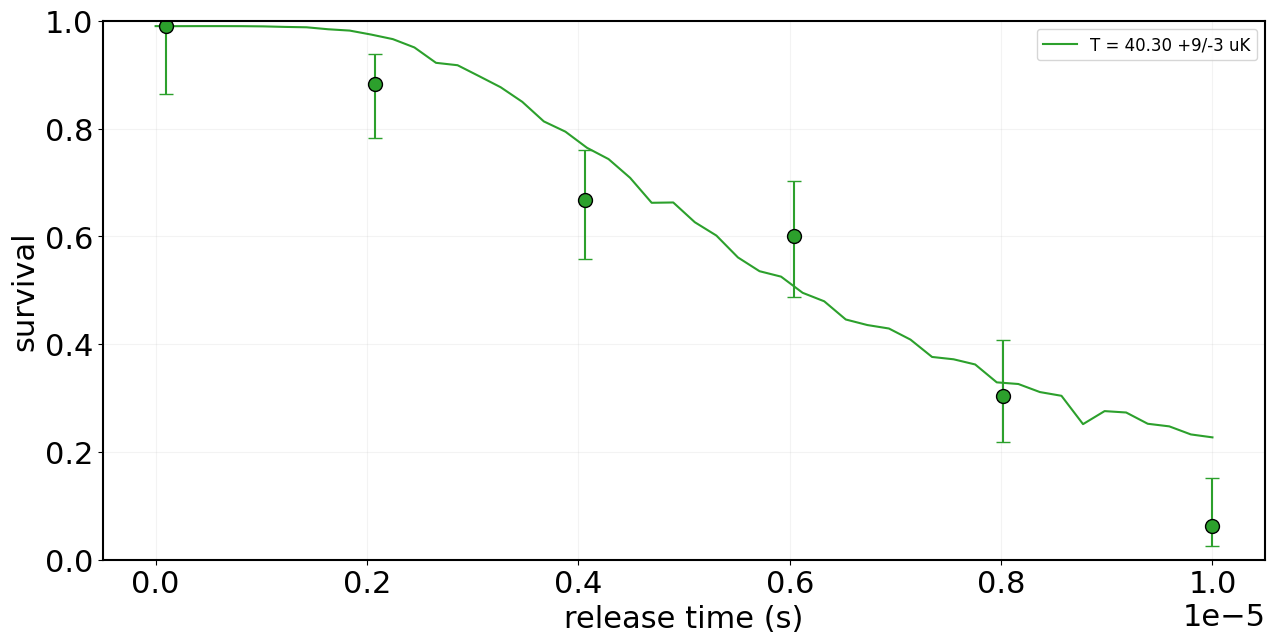

In [110]:
reloadMyModules(9,"january","2024")
fileId1 = 17
threshold = 75
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 40e-6
trap_depth = U0
load_one_y1[0]=.99
# load_one_y1[4]=.1

fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1,last_index = 4)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

### No PGC

beta = 4.11939276251547e-11 +/- 1.4648594936602402e-11


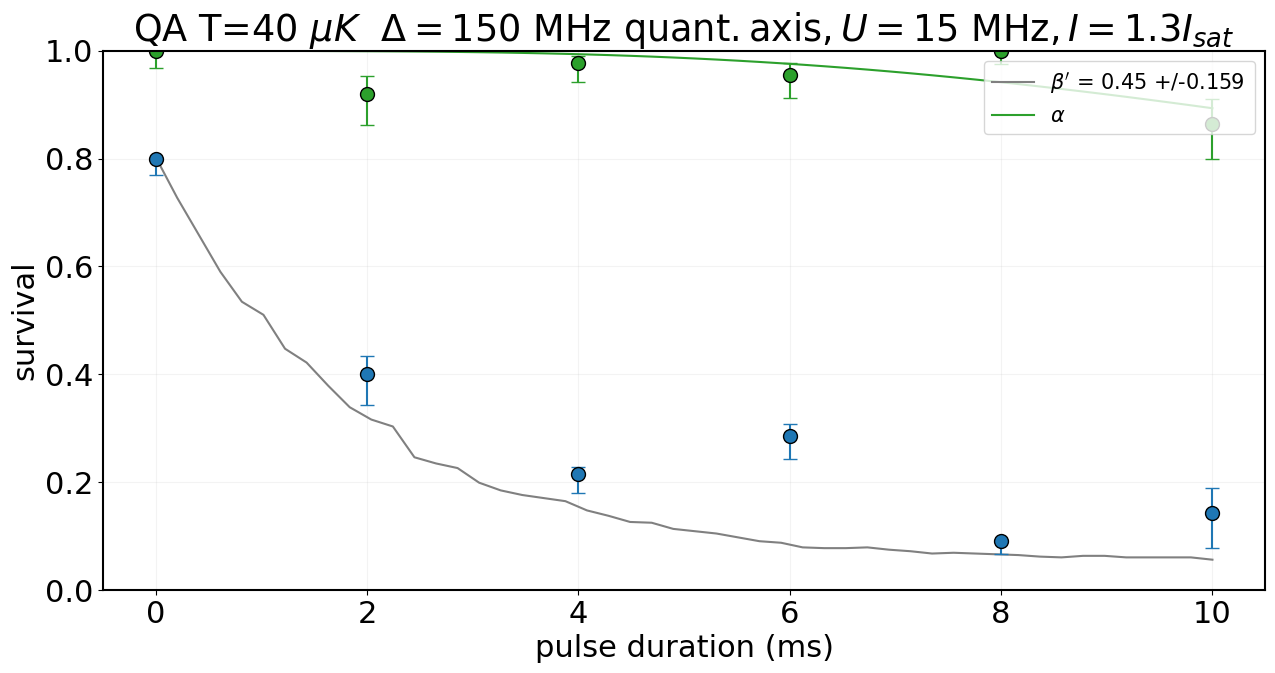

In [111]:
reloadMyModules(11,"january","2024")
fileId = 3
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

T0 = 41.84e-6
T0_unc = 1e-6
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.2,range_step=0.01)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,asymp=0.05), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_tau=False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'QA T=40 $\mu K  \ \ \Delta = 150 \ \mathrm{MHz} \ \mathrm{quant. axis}, U=15 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_40uK_D2,beta_40uK_D2_unc = lac.betaCalc(beta_prime,U0,T0,decay_unc,U0_unc,T0_unc)
print('beta =',beta_40uK_D2,'+/-',beta_40uK_D2_unc)

## 65 uK

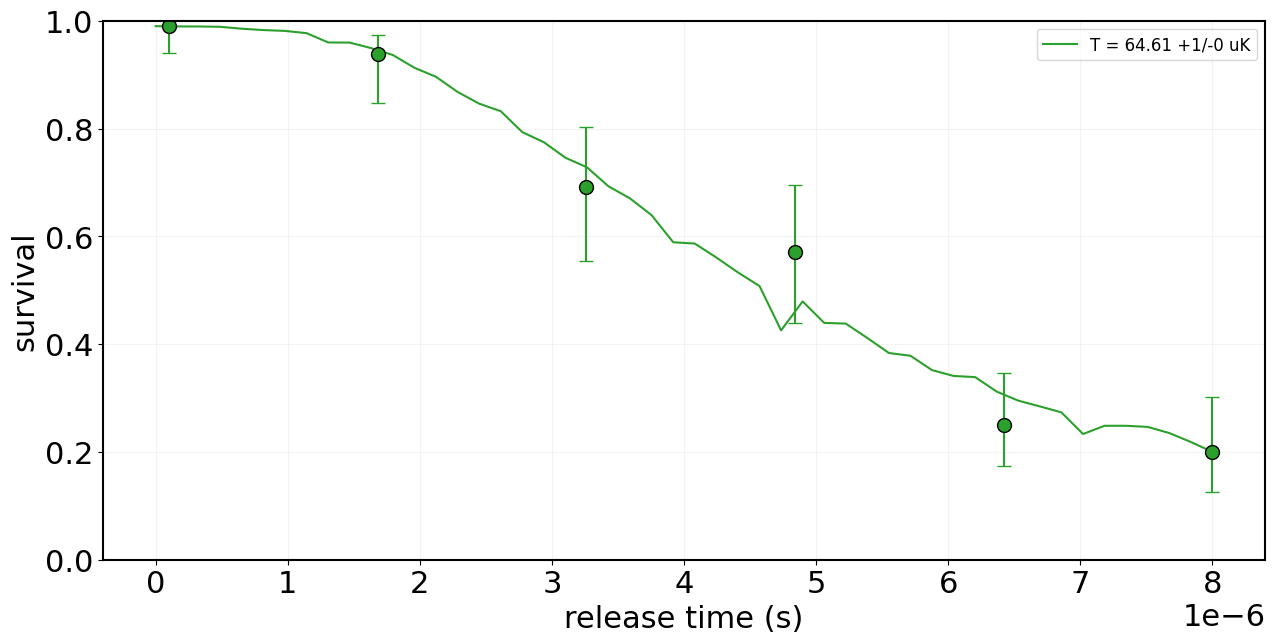

In [985]:
reloadMyModules(10,"january","2024")
fileId1 = 10
threshold = 70
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 15e-6
trap_depth = U0
load_one_y1[0]=.99

fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

### No PGC

beta = 7.588655815716033e-12 +/- 7.521155681858842e-13


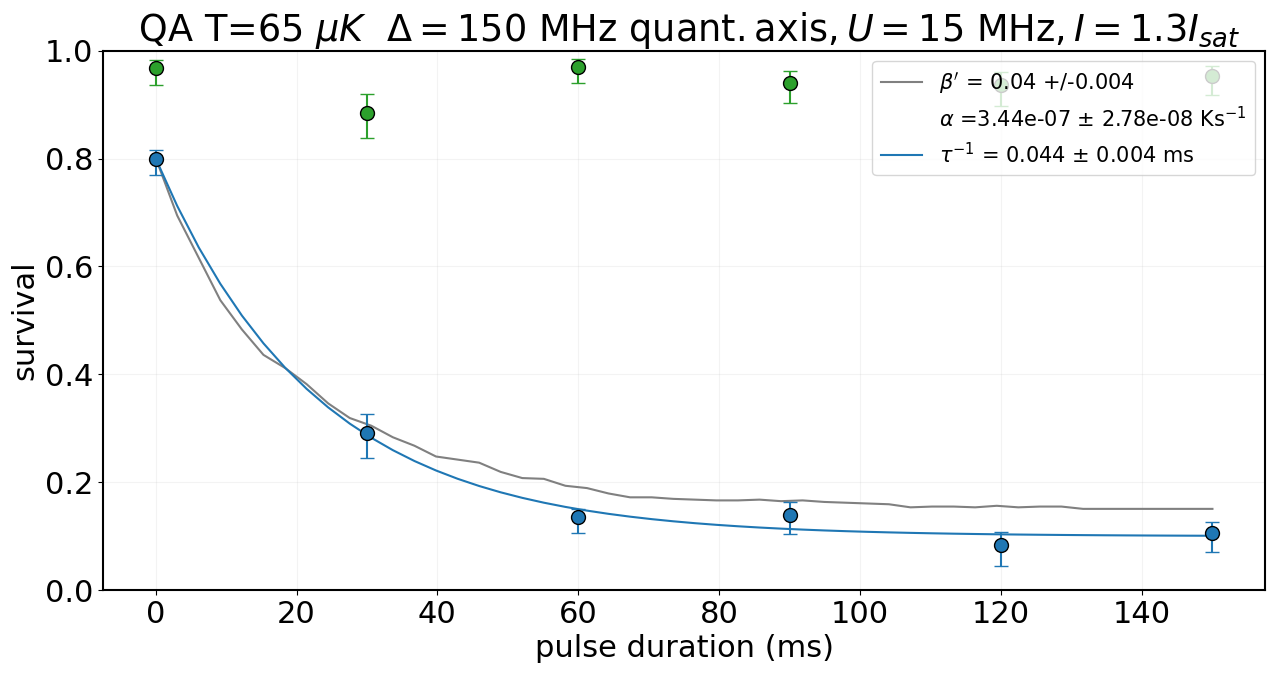

In [112]:
reloadMyModules(10,"january","2024")
fileId = 40
threshold = 63
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

T0 = 63.65e-6
T0_unc = 1e-6
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.2,range_step=0.01)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,asymp=0.15), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_tau=True,plot_alpha=True)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r' QA T=65 $\mu K  \ \ \Delta = 150 \ \mathrm{MHz} \ \mathrm{quant. axis} , U=15 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_65uK_D2,beta_65uK_D2_unc = lac.betaCalc(decay_constant,U0,T0,decay_unc,U0_unc,T0_unc)
print('beta =',beta_65uK_D2,'+/-',beta_65uK_D2_unc)

## 90 uK

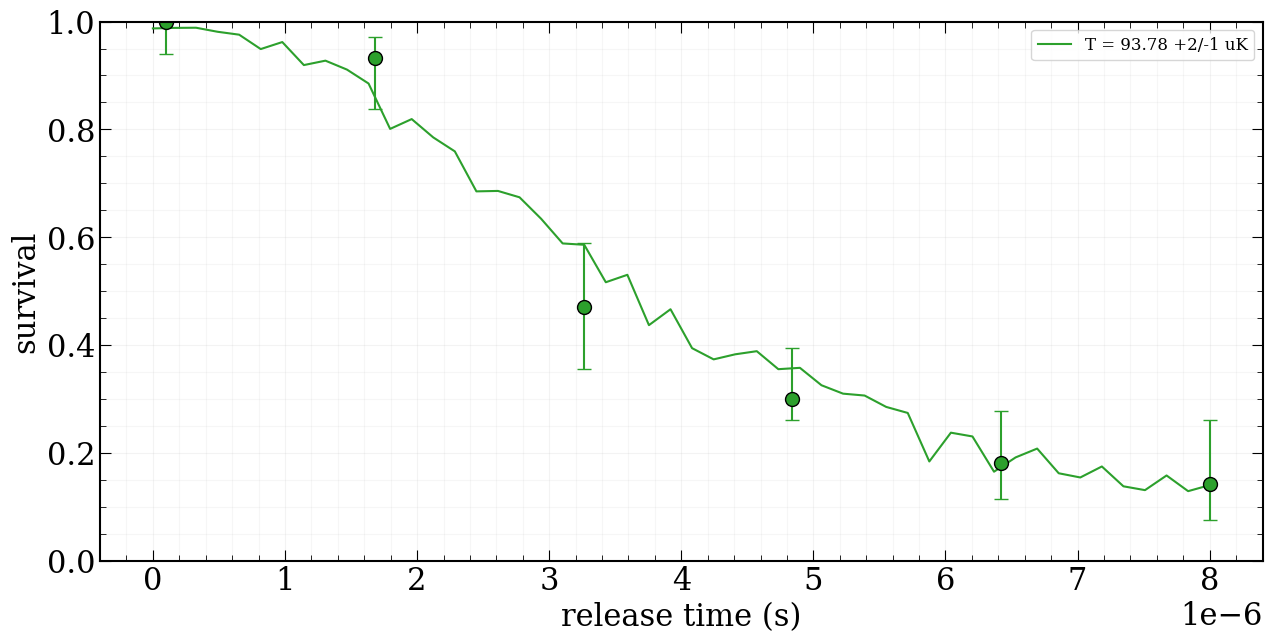

In [40]:
reloadMyModules(10,"january","2024")
threshold = 75
fileId1 = 50
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 15e-6
trap_depth = U0
# load_one_y1[0]=.99
load_one_y1[3]=.3

fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.1e-6),color=color1,last_index = 4)


ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

### No PGC

beta = 2.0976048287207624e-12 +/- 3.706409782409818e-13


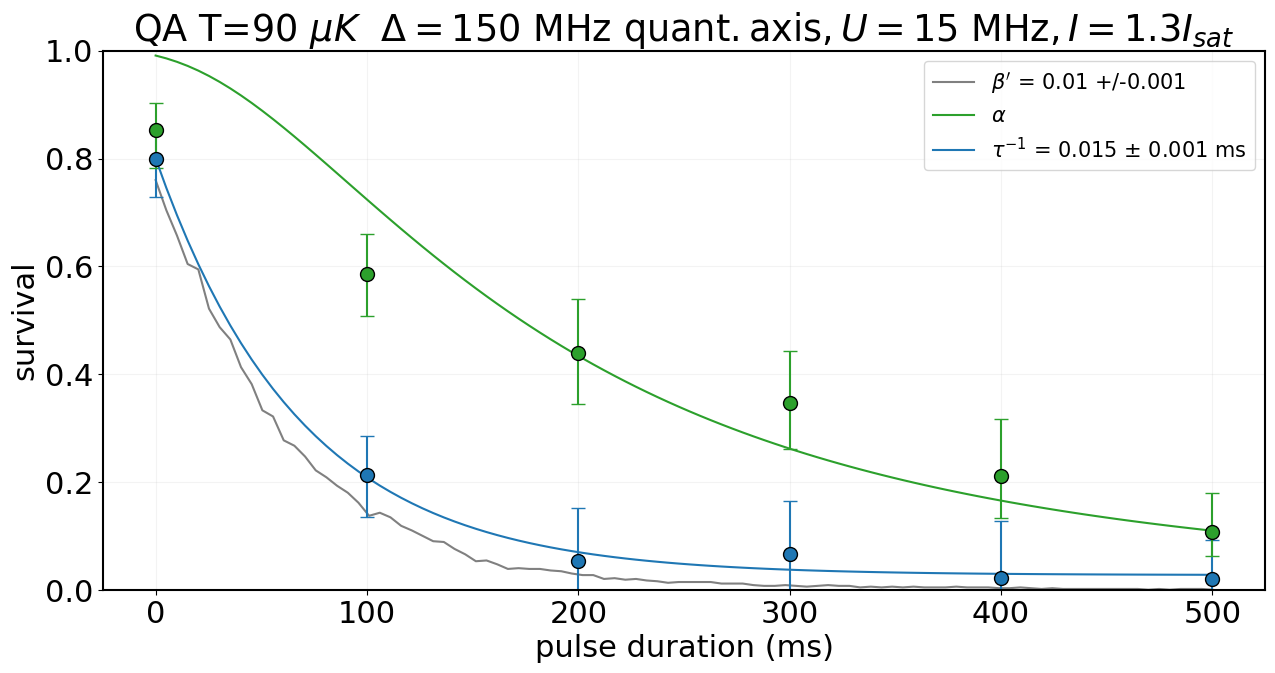

In [113]:
reloadMyModules(11,"january","2024")
fileId = 8
threshold = 75
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

T0 = 87.74e-6
T0_unc = 1e-6
num_points = 100
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.2,range_step=0.01)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,start=0.8,asymp=0.0), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_tau=True)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'QA T=90 $\mu K  \ \ \Delta = 150 \ \mathrm{MHz} \ \mathrm{quant. axis}, U=15 \ \mathrm{MHz}, I=1.3I_{sat} $');
one_body_loss = .007
beta_90uK_D2,beta_90uK_D2_unc = lac.betaCalc(beta_prime-one_body_loss,U0,T0,decay_unc,U0_unc,T0_unc)
print('beta =',beta_90uK_D2,'+/-',beta_90uK_D2_unc)

## D2 Plots

<ErrorbarContainer object of 3 artists>

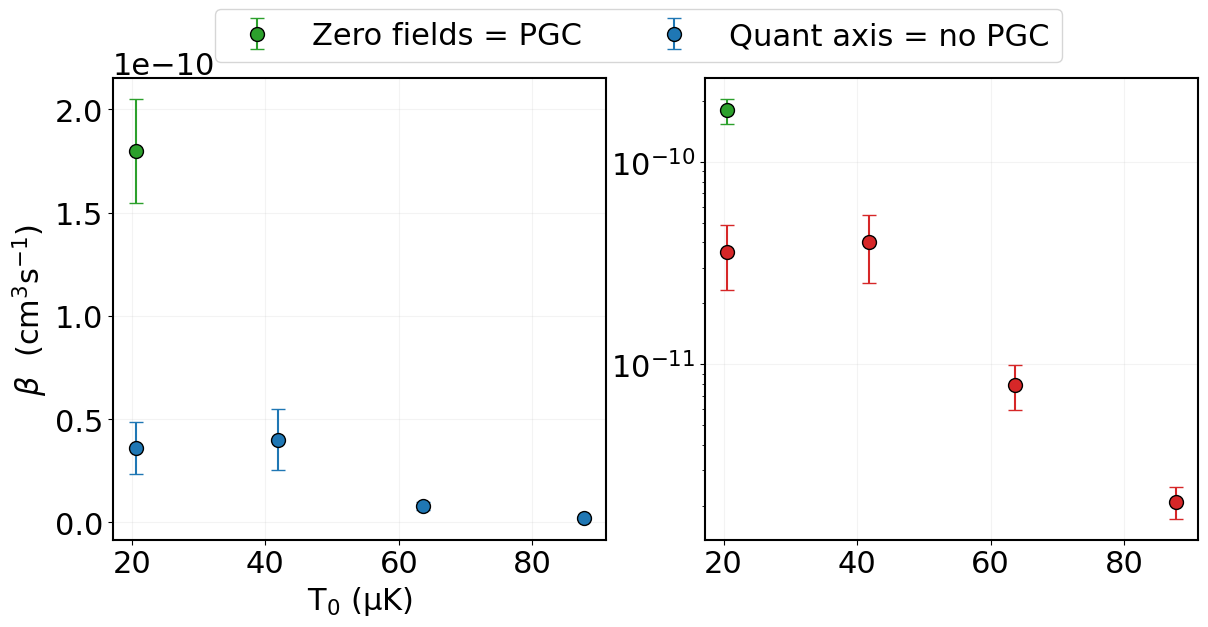

In [99]:
T_D2 = [20.58,41.84,63.6,87.7]
beta_D2 = [beta_15uK_D2,beta_40uK_D2,beta_65uK_D2,beta_90uK_D2]
beta_D2_unc = [beta_15uK_D2_unc,beta_40uK_D2_unc,beta_65uK_D2_unc,beta_90uK_D2_unc]

T_PGC= [20.58]
beta_PGC = [beta_15uK_PGC]
beta_PGC_unc = [beta_15uK_PGC_unc]


fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # Create a figure with two subplots

axs[0].errorbar(T_PGC, beta_PGC, yerr=beta_PGC_unc,ecolor=color1, ls='none', marker='o', markersize=10,
                markerfacecolor=color1, markeredgecolor='k', capsize=5, label='Zero fields = PGC')

axs[0].errorbar(T_D2, beta_D2, yerr=beta_D2_unc,ecolor=color2, ls='none', marker='o', markersize=10,
                markerfacecolor=color2, markeredgecolor='k', capsize=5, label= 'Quant axis = no PGC')

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=3)

axs[0].set_ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
axs[0].set_xlabel(r'$\mathrm{T_0} \ (\mathrm{\mu K})$')
# axs[0].set_title('Non-log Scale')
axs[0].grid(True)
# Log scale plot
axs[1].set_yscale('log')
axs[1].errorbar(T_PGC, beta_PGC, yerr=beta_PGC_unc,ecolor=color1, ls='none', marker='o', markersize=10,
                markerfacecolor=color1, markeredgecolor='k', capsize=5)

axs[1].errorbar(T_D2, beta_D2, yerr=beta_D2_unc, ls='none', marker='o', markersize=10,
                markerfacecolor=color3,ecolor=color3, markeredgecolor='k', capsize=5)




In [114]:
beta_D2_unc

[2.5286863710629768e-11, 1.4648594936602402e-11, 2e-12, 3.706409782409818e-13]

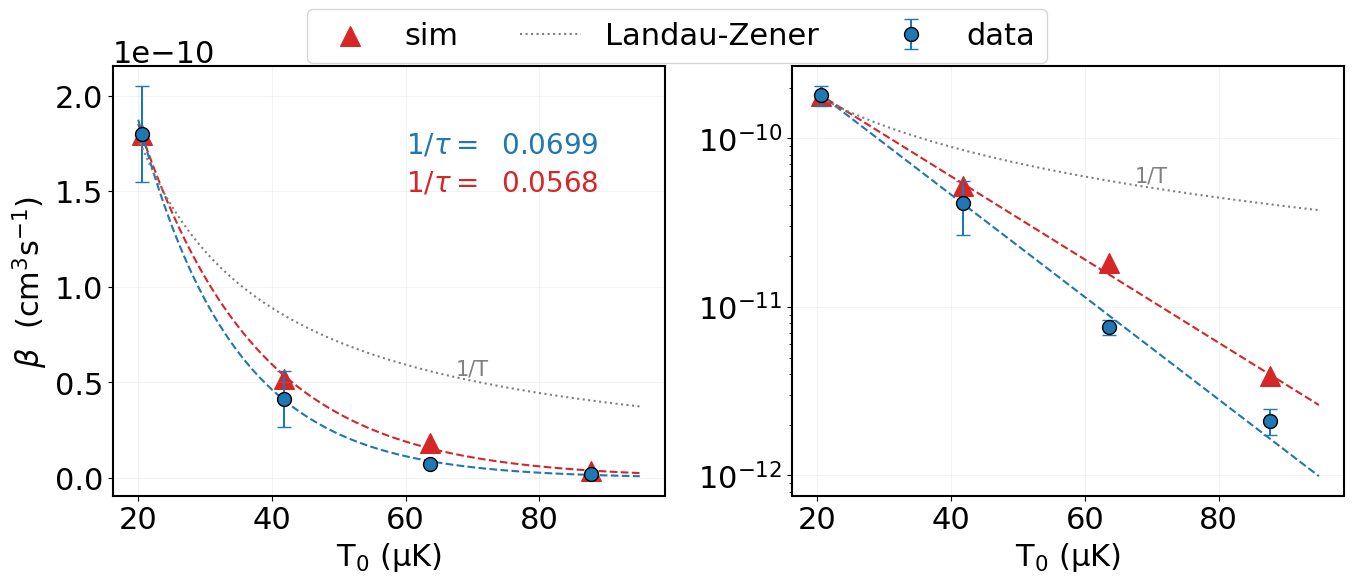

In [115]:
T_D2 = [20.58,41.84,63.6,87.7]

beta_D2 = [beta_15uK_PGC,beta_40uK_D2,beta_65uK_D2,beta_90uK_D2]
beta_D2_unc = [beta_15uK_PGC_unc,beta_40uK_D2_unc,beta_65uK_D2_unc,beta_90uK_D2_unc]
beta_sim = np.array([0.0138, 0.004, 0.0014, 0.0003])


def decaying_exponential(x, a, b):
    return a * np.exp(-b * x) 

#### simulation fit
initial_guesses_sim = [0.01, 0.05]  # [a, b, c]
popt_sim, pcov_sim = curve_fit(decaying_exponential, T_D2, beta_sim, p0=initial_guesses_sim)
new_temps = np.linspace(20, 95, 100)  # Adjust the range and number of points as needed
smoothed_curve_sim = np.interp(new_temps, temps, beta_sim)


#### data fit
initial_guesses_data = [1e-10, 0.05]  # [a, b, c]
popt_data, pcov_data = curve_fit(decaying_exponential, T_D2, beta_D2, p0=initial_guesses_data)
new_temps = np.linspace(20, 95, 100)  # Adjust the range and number of points as needed
smoothed_curve_data = np.interp(new_temps, temps, beta_D2)

scale_fact = 1.3e-8

fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # Create a figure with two subplots

axs[0].errorbar(T_D2, beta_D2, yerr=beta_D2_unc,ecolor=color2, ls='none', marker='o', markersize=10,
                markerfacecolor=color2, markeredgecolor='k', capsize=5, label= 'data')

axs[0].scatter(T_D2, beta_sim*scale_fact, marker = '^',s = 200,color = 'tab:red', label = 'sim')

axs[0].plot(new_temps, decaying_exponential(new_temps, *popt_sim)*scale_fact,color = 'tab:red', linestyle = '--')
axs[0].plot(new_temps, decaying_exponential(new_temps, *popt_data), color = 'tab:blue', linestyle = '--')

delta = 150*1e6
axs[0].plot(new_temps,lac.P_inelastic_blue(new_temps,cs.IsatD2,cs.muD2,delta)*3.2, color = 'grey',linestyle = ':',label = 'Landau-Zener')

axs[0].set_ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
axs[0].set_xlabel(r'$\mathrm{T_0} \ (\mathrm{\mu K})$')
axs[0].grid(True)



axs[1].errorbar(T_D2, beta_D2, yerr=beta_D2_unc, ls='none', marker='o', markersize=10,
                markerfacecolor=color2,ecolor=color2, markeredgecolor='k', capsize=5)

axs[1].plot(new_temps, decaying_exponential(new_temps, *popt_data), color = 'tab:blue', linestyle = '--')
axs[1].scatter(T_D2, beta_sim*scale_fact, marker = '^',s = 200,color = 'tab:red')
axs[1].plot(new_temps, decaying_exponential(new_temps, *popt_sim)*scale_fact,color = 'tab:red', linestyle = '--')


axs[1].set_xlabel(r'$\mathrm{T_0} \ (\mathrm{\mu K})$')
axs[1].set_yscale('log')
axs[1].grid(True)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=3)

x = np.linspace(15,93,100)
decay_constant_sim = popt_sim[1] 
decay_constant_data = popt_data[1] 
axs[0].text(60, 1.7e-10, rf"$1/\tau = $  {decay_constant_data:.4f}", fontsize=20, color='tab:blue')  # Adjust the position as needed
axs[0].text(60, 1.5e-10, rf"$1/\tau = $  {decay_constant_sim:.4f}", fontsize=20, color='tab:red') 


axs[1].plot(new_temps,lac.P_inelastic_blue(new_temps,cs.IsatD2,cs.muD2,delta)*3.2, color = 'grey',linestyle = ':',label = 'Landau-Zener')
axs[0].text(70, 5.2e-11, '1/T', fontsize=15, color='grey', ha='center', va='bottom')
axs[1].text(70, 5.2e-11, '1/T', fontsize=15, color='grey', ha='center', va='bottom')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# D1 vs D2

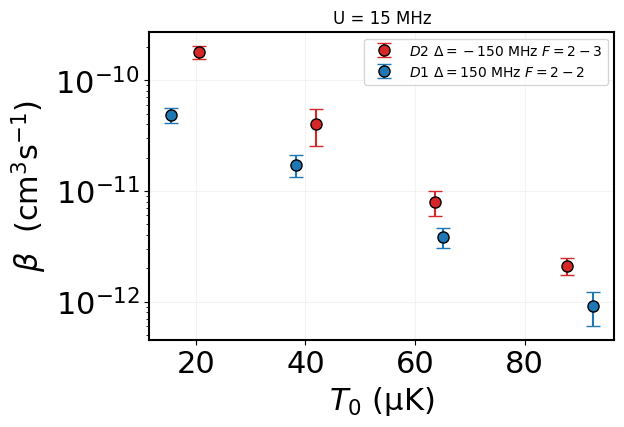

In [108]:
fig, ax = plt.subplots(figsize=(6, 4))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 17}


color3 = 'tab:red'
beta_D2 = [beta_15uK_PGC,beta_40uK_D2,beta_65uK_D2,beta_90uK_D2]
beta_D2_unc = [beta_15uK_PGC_unc,beta_40uK_D2_unc,beta_65uK_D2_unc,beta_90uK_D2_unc]

beta_D1 = [beta_15uK_LGM,beta_40uK_D1,beta_65uK_D1,beta_90uK_D1]
beta_D1_unc = [beta_15uK_LGM_unc,beta_40uK_D1_unc,beta_65uK_D1_unc,beta_90uK_D1_unc]

ax.errorbar(T_D2,beta_D2, yerr=beta_D2_unc,ls='none',ecolor=color3,marker = 'o',markersize = 8,
            markerfacecolor=color3,markeredgecolor='k',capsize=5,label=r'$D2 \ \Delta = -150 \ \mathrm{MHz} \  F=2-3$')

ax.errorbar(T_D1,beta_D1, yerr=beta_D1_unc,ls='none',ecolor=color2,marker = 'o',markersize = 8,
            markerfacecolor=color2,markeredgecolor='k',capsize=5,label=r'$D1 \ \Delta = 150 \ \mathrm{MHz} \  F=2-2$')

# ax.set_ylim(9e-13,1.9e-10)
ax.set_yscale('log')
plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'$T_0 \ \mathrm{(\mu K)}$')
plt.title(r'U = 15 MHz',fontsize=12) 
plt.legend(fontsize = 10)
plt.rcParams["axes.linewidth"] = 1.5

# temp-field comparisons

### $ \Delta = 100 \ \mathrm{(MHz) \ D1 \ F=2-2}$

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 22:35:16: on (Y-M-D) 2023-10-24, And ended at 22:41:30: on 2023-10-24
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 22:42:44: on (Y-M-D) 2023-10-24, And ended at 22:49:0: on 2023-10-24
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 22:55:1: on (Y-M-D) 2023-10-24, And ended at 23:1:16: on 2023-10-24
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

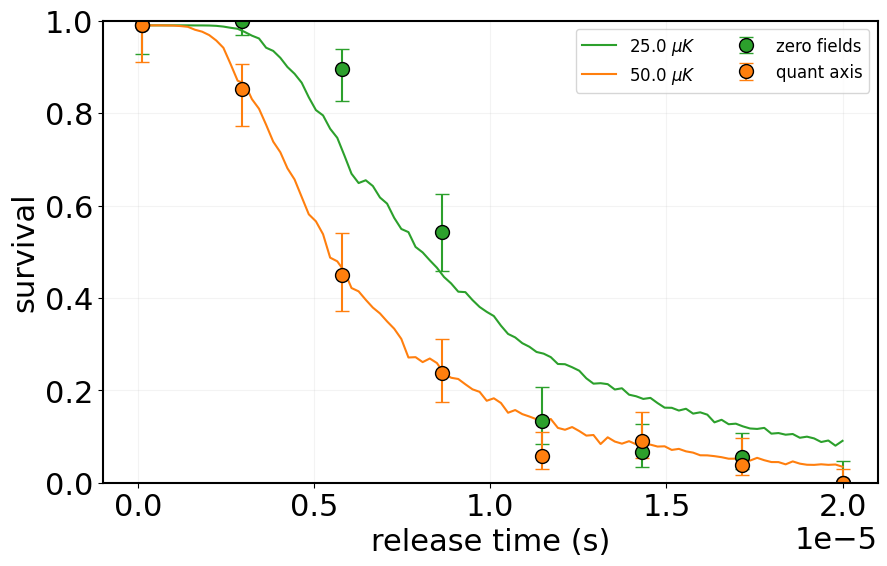

In [90]:
reloadMyModules(24,'october')
fileId = 54
threshold = 70

dataset1 = ta.standardTransferAnalysis(54, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(55, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   


dataset3 = ta.standardTransferAnalysis(56, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key3, repetitions, initThresholds, 
            fits, avgTferData3, avgTferErr3, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset3
color3 = 'tab:red'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr3)):
    up = avgTferErr3[i][0]
    lo = avgTferErr3[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err3= [upperbound,lowerbound]  

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


fig, ax = plt.subplots(figsize=(10, 6))

t = np.linspace(key1[0], max(key1), len(key1))
ticks = np.arange(0,max(key1),100)
avgTferData1[0]=.99
avgTferData2[2]=.45
avgTferData2[0]=.99
avgTferData3[0]=.99
avgTferData3[3]=.6
tempGuess1 = 25e-6
tempGuess2 = 50e-6
tempGuess3 = 25e-6
color3 = 'tab:orange'
t_temp = np.linspace(0, 20e-6, 100)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5,label= 'zero fields')
ax.errorbar(key2*1e-3,avgTferData2, yerr=err2,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'quant axis')
# ax.errorbar(key3*1e-3,avgTferData3, yerr=err3,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'no fields')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess1, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color1,label= str(tempGuess1*1e6)+r'$ \ \mu K$')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess2, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess2*1e6)+r'$ \ \mu K$')
# ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess3, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess3*1e6)+r'$ \ \mu K$')
ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 
# plt.title(r'U = 10 MHz,I=Isat, $ \Delta = 100 \ \mathrm{(MHz) \ D1 \ F=2-2}$',fontsize=15);

### $ \Delta = -100 \ \mathrm{(MHz) \ D1 \ F=2-2}$

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 23:14:50: on (Y-M-D) 2023-10-24, And ended at 23:21:4: on 2023-10-24
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 23:8:13: on (Y-M-D) 2023-10-24, And ended at 23:14:28: on 2023-10-24
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 23:21:21: on (Y-M-D) 2023-10-24, And ended at 23:27:34: on 2023-10-24
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

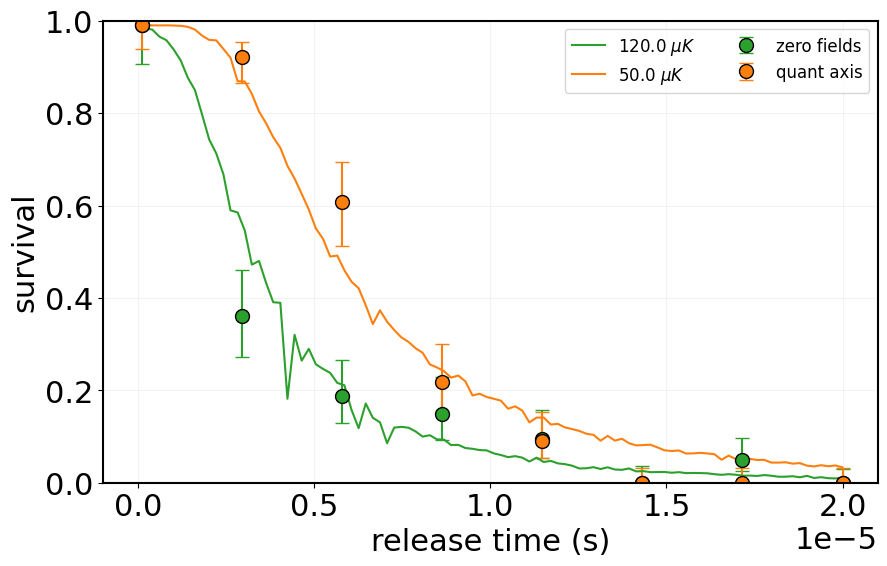

In [89]:
reloadMyModules(24,'october')
threshold = 70

dataset1 = ta.standardTransferAnalysis(58, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(57, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   


dataset3 = ta.standardTransferAnalysis(59, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key3, repetitions, initThresholds, 
            fits, avgTferData3, avgTferErr3, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset3
color3 = 'tab:orange'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr3)):
    up = avgTferErr3[i][0]
    lo = avgTferErr3[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err3= [upperbound,lowerbound]  

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


fig, ax = plt.subplots(figsize=(10, 6))

t = np.linspace(key1[0], max(key1), len(key1))
ticks = np.arange(0,max(key1),100)
avgTferData1[0]=.99
avgTferData2[0]=.99
avgTferData3[0]=.99
tempGuess1 = 120e-6
tempGuess2 = 50e-6
tempGuess3 = 120e-6
t_temp = np.linspace(0, 20e-6, 100)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5,label= 'zero fields')
ax.errorbar(key2*1e-3,avgTferData2, yerr=err2,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'quant axis')

# ax.errorbar(key3*1e-3,avgTferData3, yerr=err3,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'no fields')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess1, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color1,label= str(tempGuess1*1e6)+r'$ \ \mu K$')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess2, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess2*1e6)+r'$ \ \mu K$')
# ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess3, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess3*1e6)+r'$ \ \mu K$')
ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 
# plt.title(r'U = 10 MHz,I=Isat, $ \Delta = -100 \ \mathrm{(MHz) \ D1 \ F=2-2}$',fontsize=15);

### $ \Delta = -250 \ \mathrm{(MHz) \ D1 \ F=2-2}$

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 8:35:7: on (Y-M-D) 2023-10-25, And ended at 8:41:22: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 8:41:56: on (Y-M-D) 2023-10-25, And ended at 8:48:12: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 8:48:30: on (Y-M-D) 2023-10-25, And ended at 8:54:44: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

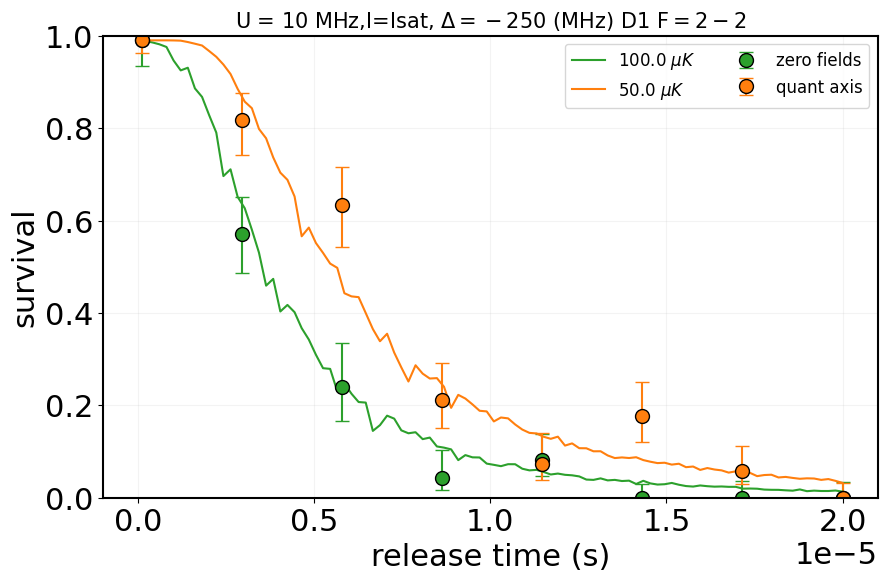

In [91]:
reloadMyModules(25,'october')
threshold = 70

dataset1 = ta.standardTransferAnalysis(1, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(2, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   


dataset3 = ta.standardTransferAnalysis(3, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key3, repetitions, initThresholds, 
            fits, avgTferData3, avgTferErr3, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset3
color3 = 'tab:orange'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr3)):
    up = avgTferErr3[i][0]
    lo = avgTferErr3[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err3= [upperbound,lowerbound]  

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


fig, ax = plt.subplots(figsize=(10, 6))

t = np.linspace(key1[0], max(key1), len(key1))
ticks = np.arange(0,max(key1),100)
avgTferData1[0]=.99
avgTferData2[0]=.99
avgTferData3[0]=.99
tempGuess1 = 100e-6
tempGuess2 = 50e-6
tempGuess3 = 100e-6
t_temp = np.linspace(0, 20e-6, 100)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5,label= 'zero fields')
ax.errorbar(key2*1e-3,avgTferData2, yerr=err2,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'quant axis')
# ax.errorbar(key3*1e-3,avgTferData3, yerr=err3,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'no fields')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess1, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color1,label= str(tempGuess1*1e6)+r'$ \ \mu K$')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess2, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess2*1e6)+r'$ \ \mu K$')
# ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess3, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess3*1e6)+r'$ \ \mu K$')

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 
plt.title(r'U = 10 MHz,I=Isat, $ \Delta = -250 \ \mathrm{(MHz) \ D1 \ F=2-2}$',fontsize=15);

### $ \Delta = 250 \ \mathrm{(MHz) \ D1 \ F=2-2}$'

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 8:57:33: on (Y-M-D) 2023-10-25, And ended at 9:3:48: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 9:4:51: on (Y-M-D) 2023-10-25, And ended at 9:11:9: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 9:11:33: on (Y-M-D) 2023-10-25, And ended at 9:17:47: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

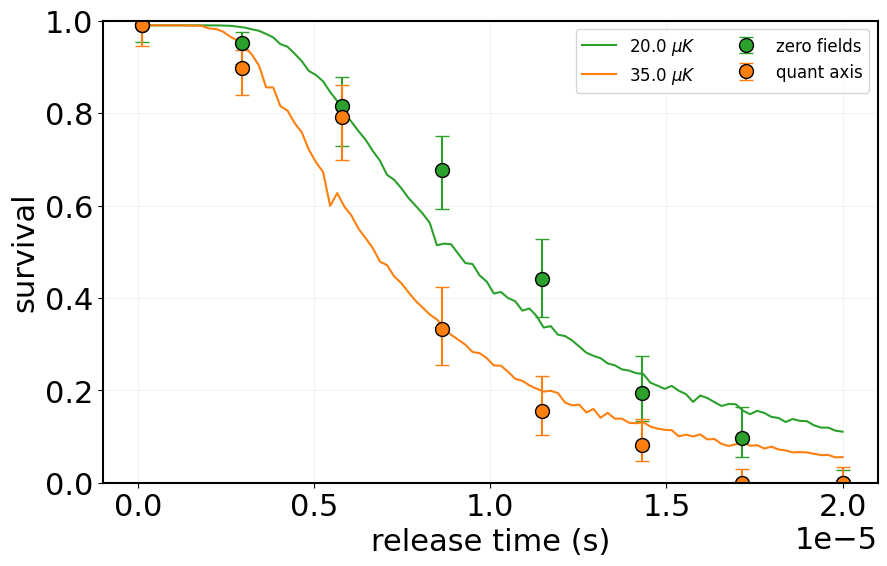

In [93]:
reloadMyModules(25,'october')
threshold = 70

dataset1 = ta.standardTransferAnalysis(4, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(5, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   


dataset3 = ta.standardTransferAnalysis(6, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key3, repetitions, initThresholds, 
            fits, avgTferData3, avgTferErr3, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset3
color3 = 'tab:orange'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr3)):
    up = avgTferErr3[i][0]
    lo = avgTferErr3[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err3= [upperbound,lowerbound]  

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


fig, ax = plt.subplots(figsize=(10, 6))

t = np.linspace(key1[0], max(key1), len(key1))
ticks = np.arange(0,max(key1),100)
avgTferData1[0]=.99

avgTferData2[0]=.99
avgTferData3[0]=.99

tempGuess1 = 20e-6
tempGuess2 = 35e-6
tempGuess3 = 20e-6
t_temp = np.linspace(0, 20e-6, 100)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5,label= 'zero fields')
ax.errorbar(key2*1e-3,avgTferData2, yerr=err2,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'quant axis')
# ax.errorbar(key3*1e-3,avgTferData3, yerr=err3,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'no fields')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess1, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color1,label= str(tempGuess1*1e6)+r'$ \ \mu K$')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess2, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess2*1e6)+r'$ \ \mu K$')
# ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess3, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess3*1e6)+r'$ \ \mu K$')

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 
# plt.title(r'U = 10 MHz,I=Isat, $ \Delta = 250 \ \mathrm{(MHz) \ D1 \ F=2-2}$',fontsize=15);

### $ \Delta = -100 \ \mathrm{(MHz) \ D2 \ F=2-3}$'

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 9:54:16: on (Y-M-D) 2023-10-25, And ended at 10:0:36: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 10:0:50: on (Y-M-D) 2023-10-25, And ended at 10:7:11: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 10:7:27: on (Y-M-D) 2023-10-25, And ended at 10:13:47: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

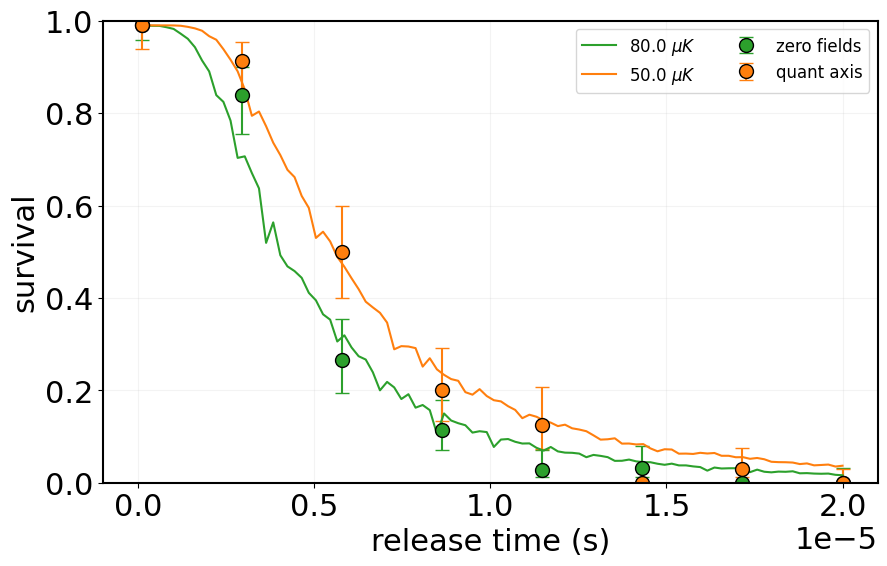

In [94]:
reloadMyModules(25,'october')
threshold = 70

dataset1 = ta.standardTransferAnalysis(9, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(10, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   


dataset3 = ta.standardTransferAnalysis(11, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key3, repetitions, initThresholds, 
            fits, avgTferData3, avgTferErr3, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset3
color3 = 'tab:orange'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr3)):
    up = avgTferErr3[i][0]
    lo = avgTferErr3[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err3= [upperbound,lowerbound]  

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


fig, ax = plt.subplots(figsize=(10, 6))

t = np.linspace(key1[0], max(key1), len(key1))
ticks = np.arange(0,max(key1),100)
avgTferData1[0]=.99

avgTferData2[0]=.99
avgTferData3[0]=.99

tempGuess1 = 80e-6
tempGuess2 = 50e-6
tempGuess3 = 70e-6
t_temp = np.linspace(0, 20e-6, 100)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5,label= 'zero fields')
ax.errorbar(key2*1e-3,avgTferData2, yerr=err2,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'quant axis')
# ax.errorbar(key3*1e-3,avgTferData3, yerr=err3,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'no fields')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess1, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color1,label= str(tempGuess1*1e6)+r'$ \ \mu K$')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess2, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess2*1e6)+r'$ \ \mu K$')
# ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess3, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess3*1e6)+r'$ \ \mu K$')

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 
# plt.title(r'U = 10 MHz,I=Isat, $ \Delta = -100 \ \mathrm{(MHz) \ D2 \ F=2-3}$',fontsize=15);

### $ \Delta = 100 \ \mathrm{(MHz) \ D2 \ F=2-3}$'

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 10:16:58: on (Y-M-D) 2023-10-25, And ended at 10:23:17: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 10:23:36: on (Y-M-D) 2023-10-25, And ended at 10:29:58: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 10:30:15: on (Y-M-D) 2023-10-25, And ended at 10:36:34: on 2023-10-25
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

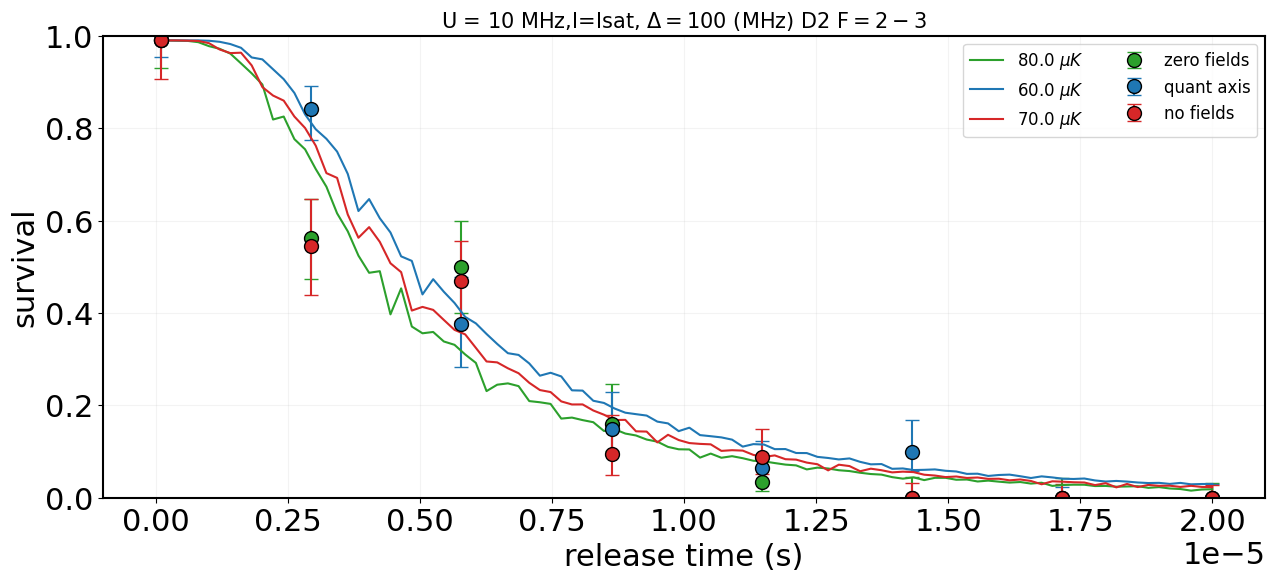

In [391]:
reloadMyModules(25,'october')
threshold = 70

dataset1 = ta.standardTransferAnalysis(12, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(13, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   


dataset3 = ta.standardTransferAnalysis(14, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key3, repetitions, initThresholds, 
            fits, avgTferData3, avgTferErr3, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset3
color3 = 'tab:red'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr3)):
    up = avgTferErr3[i][0]
    lo = avgTferErr3[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err3= [upperbound,lowerbound]  

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


fig, ax = plt.subplots(figsize=(15, 6))

t = np.linspace(key1[0], max(key1), len(key1))
ticks = np.arange(0,max(key1),100)
avgTferData1[0]=.99

avgTferData2[0]=.99
avgTferData3[0]=.99

tempGuess1 = 80e-6
tempGuess2 = 60e-6
tempGuess3 = 70e-6
t_temp = np.linspace(0, 20e-6, 100)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5,label= 'zero fields')
ax.errorbar(key2*1e-3,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 10,markerfacecolor=color2,markeredgecolor='k',capsize=5,label= 'quant axis')
ax.errorbar(key3*1e-3,avgTferData3, yerr=err3,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5,label= 'no fields')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess1, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color1,label= str(tempGuess1*1e6)+r'$ \ \mu K$')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess2, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color2,label= str(tempGuess2*1e6)+r'$ \ \mu K$')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess3, initial_survival=.99, tweezer_depth=1e-3, verbose=True),color=color3,label= str(tempGuess3*1e6)+r'$ \ \mu K$')

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 
plt.title(r'U = 10 MHz,I=Isat, $ \Delta = 100 \ \mathrm{(MHz) \ D2 \ F=2-3}$',fontsize=15);